In [2]:
import importlib
import math
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import scipy.optimize as sco
import setup_analysis as sa
import time
import ri_water_model as wm



In [166]:
# some reloads
importlib.reload(sa)
importlib.reload(wm)

<module 'ri_water_model' from '/Users/jsyme/Documents/PRGS/Classes/2021/RDM Tutorial/tutorial2021/code/crdm_project/python/ri_water_model.py'>

In [5]:
# read in input data
df_model_data = pd.read_csv(sa.fp_csv_baseline_trajectory_model_input_data)
df_climate_deltas = pd.read_csv(sa.fp_csv_climate_deltas)
df_climate_deltas_annual = pd.read_csv(sa.fp_csv_climate_deltas_annual)

In [43]:
df_attribute_primary = pd.DataFrame([tuple(x) for x in itertools.product(df_strat_full["strategy_id"].unique(), df_fut["future_id"].unique())])
df_attribute_primary.rename(columns = {0: "strategy_id", 1: "future_id"}, inplace = True)
cols = list(df_attribute_primary.columns)
df_attribute_primary["primary_id"] = range(len(df_attribute_primary))
df_attribute_primary = df_attribute_primary[["primary_id"] + cols]
df_attribute_primary.to_csv("/Users/jsyme/Documents/PRGS/Classes/2021/RDM Tutorial/tutorial2021/code/workbooks_weekly/aws_demo/experimental_design/attribute_primary_id.csv", index = None, encoding = "UTF-8")
                            
                            

## Examine default model states, parameters, and levers

In [5]:
# default dictionary of initial states
wm.md_dict_initial_states

{'reservoir_storage_million_m3': 150, 'groundwater_storage_million_m3': 14000}

In [6]:
# default dictionary of model parameters (many of which are calibrated)
wm.md_dict_parameters

{'area_catchment_km2': 4000,
 'costs_unmet_demand': [5, 1000, 1000],
 'groundwater_inflow_m3s': 5,
 'maximum_gw_discharge_m3s': 12.5,
 'maximum_reservoir_outflow_m3s': 25,
 'proportion_gw_discharge': 0.015,
 'proportion_precip_runoff': 0.3,
 'proportion_precip_infiltration': 0.7,
 'proportion_agricultural_water_runoff': 0.5}

In [7]:
#
# default single-values of levers; NOTE: the keys here can be added to df_in (df_model_data) to create a time series lever, and it will override the default
# e.g., if the reservoir increases capacity, you would add a column called "capacity_reservoir_million_m3" to df_in 
# then, you'd specify the capacity by year and month. Remember to avoid changing the default value in the model historical period
#
wm.md_dict_default_levers

{'capacity_reservoir_million_m3': 300,
 'increase_ag_efficiency_rate': 0,
 'increase_mun_efficiency_rate': 0,
 'transmission_gw_ag_m3s': nan,
 'transmission_gw_mun_m3s': 2.5,
 'transmission_res_ag_m3s': 10,
 'transmission_res_mun_m3s': 10,
 'recylcing_proportion_mun': 0.2,
 'wastewater_treatment_capacity_m3s': 0.5}

## Run the model under default conditions

In [30]:
#importlib.reload(wm)
# run the model with defaults
df_out = wm.ri_water_resources_model(
    df_model_data,
    wm.md_dict_initial_states,
    wm.md_dict_parameters,
    wm.md_dict_default_levers
)

RI model done in 7.54 seconds.


In [27]:
df_out.head()

,year,month,x_11_m3,x_12_m3,x_21_m3,x_22_m3,d_1_m3,d_2_m3,d_3_m3,s_1_m3,...,r_m3,f_1_m3,f_2_m3,groundwater_storage_m3,reservoir_storage_m3,reservoir_release_m3,reservoir_spillage_m3,gw_discharge_m3,gw_recharge_m3,precip_runoff_m3
0,2011,1,5.750313e+07,6.696000e+06,0.0,2.244536e+07,5.750313e+07,2.914136e+07,100000000.0,5.750313e+07,...,52010150.0,546500.0,1339200.0,1.395117e+10,1.298021e+08,52010150.0,0.0,33480000.0,3.545897e+07,16832200.0
1,2011,2,6.079879e+07,6.048000e+06,0.0,2.351193e+07,6.079879e+07,2.955993e+07,100000000.0,6.079879e+07,...,48020212.5,851875.0,1209600.0,1.390663e+10,1.918889e+08,48020212.5,0.0,30240000.0,4.045144e+07,26237750.0
2,2011,3,3.791120e+07,3.584633e+06,26784000.0,2.678400e+07,6.469520e+07,3.036863e+07,100000000.0,6.469520e+07,...,44530112.5,856875.0,1339200.0,1.389164e+10,2.750550e+08,44530112.5,0.0,33480000.0,4.659056e+07,26391750.0
3,2011,4,4.157280e+07,6.480000e+06,25920000.0,2.391945e+07,6.749280e+07,3.039945e+07,100000000.0,6.749280e+07,...,51121000.0,630000.0,1296000.0,1.388549e+10,2.414512e+08,51121000.0,0.0,32400000.0,6.134119e+07,19404000.0
4,2011,5,6.728536e+07,6.696000e+06,0.0,2.451452e+07,6.728536e+07,3.121052e+07,100000000.0,6.728536e+07,...,28669300.0,1515000.0,1339200.0,1.384756e+10,2.672768e+08,28669300.0,0.0,33480000.0,5.614583e+07,46662000.0


In [11]:
2.5*30*86400

6480000.0

## Explore model output by variable

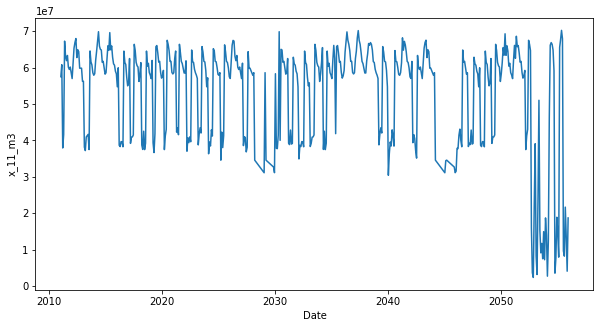

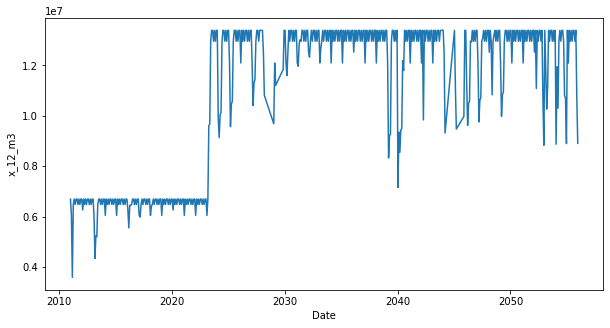

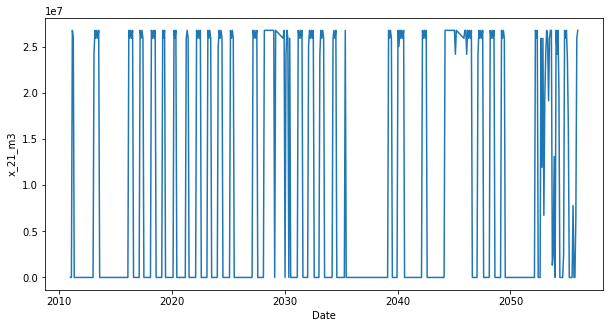

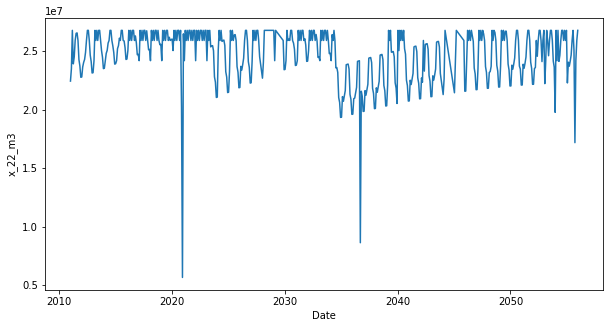

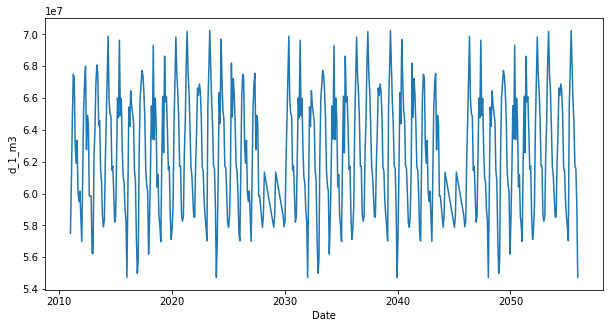

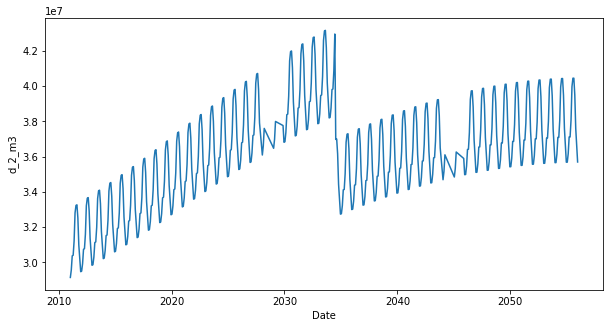

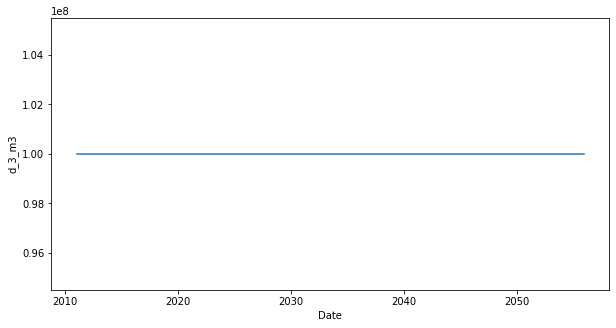

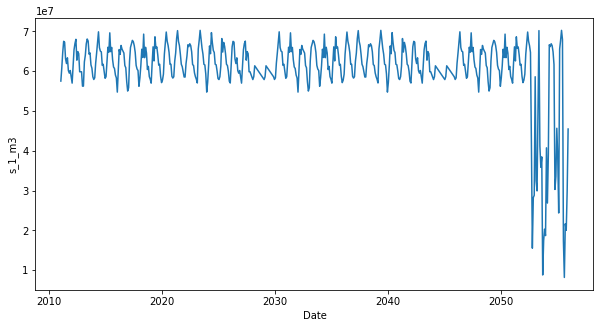

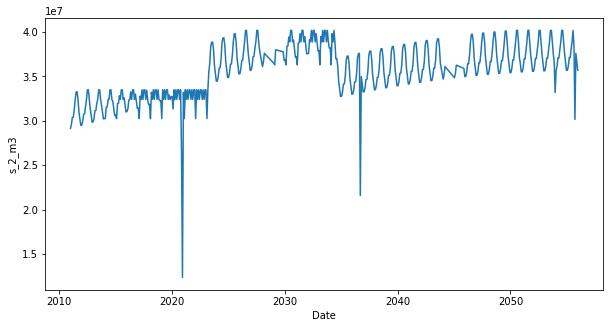

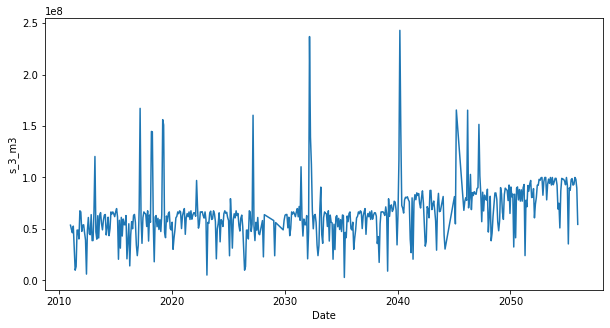

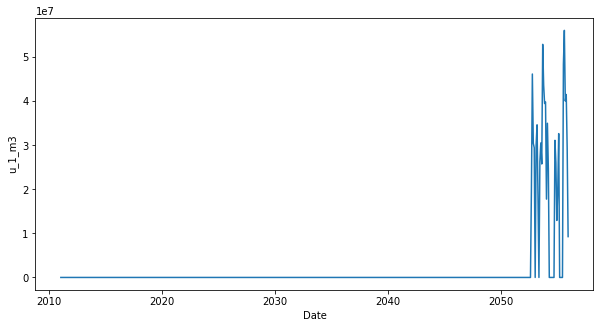

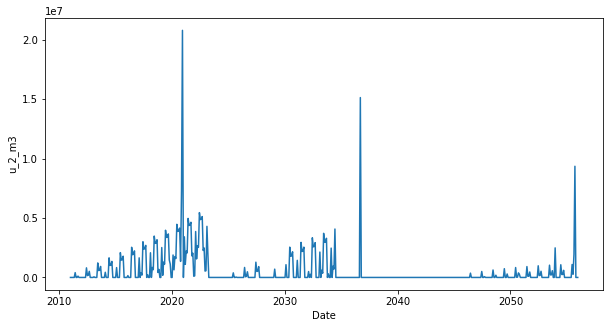

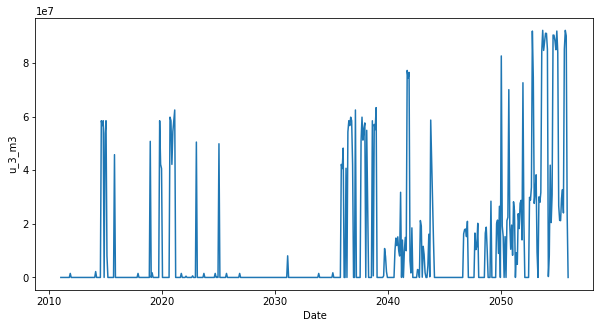

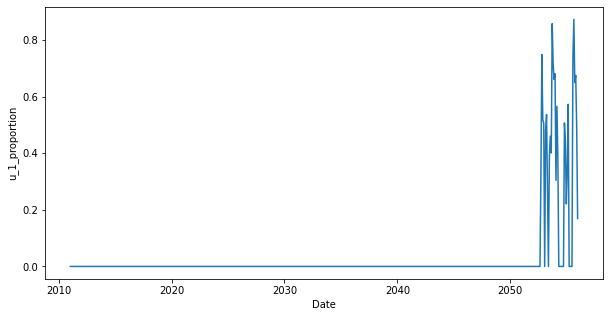

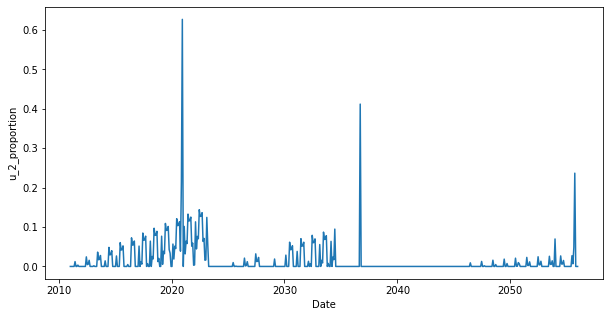

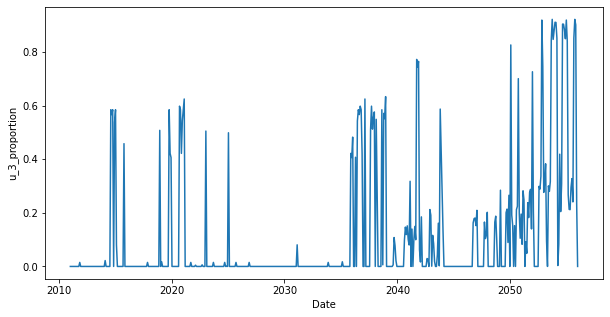

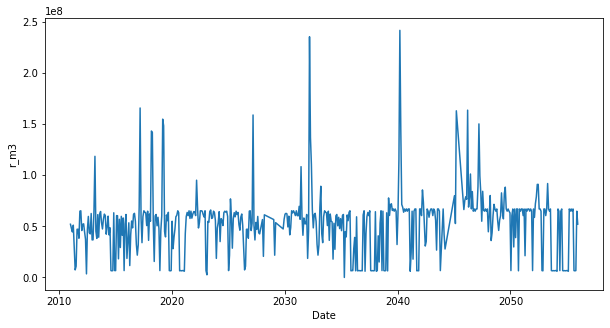

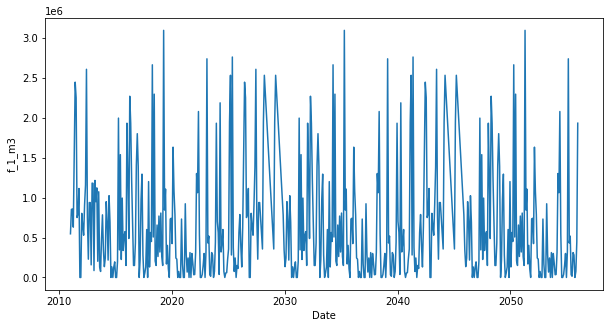

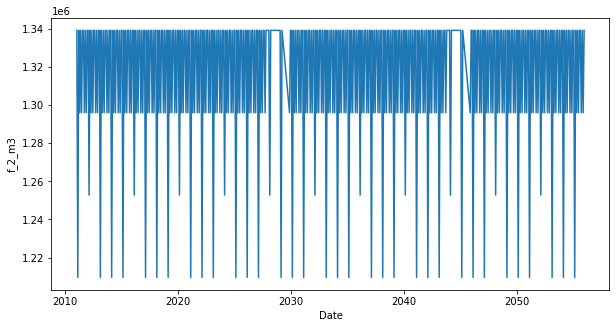

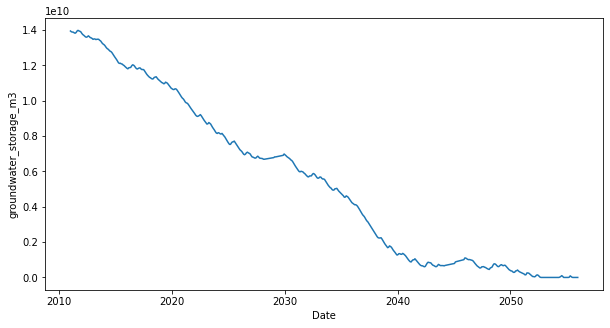

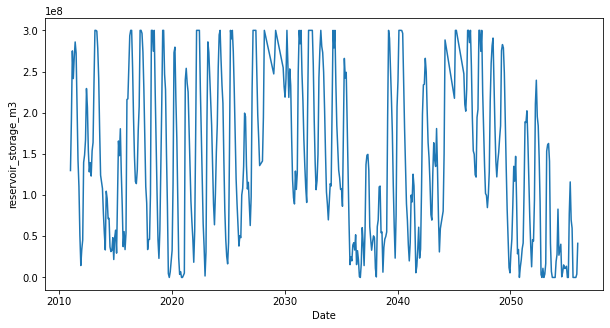

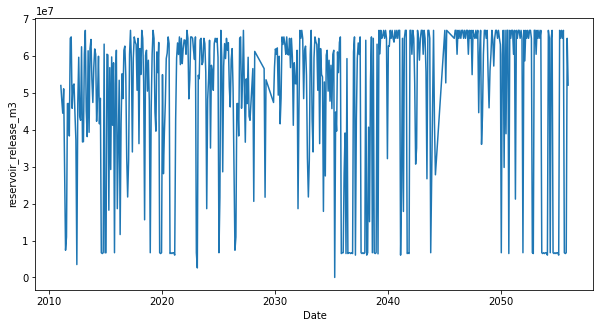

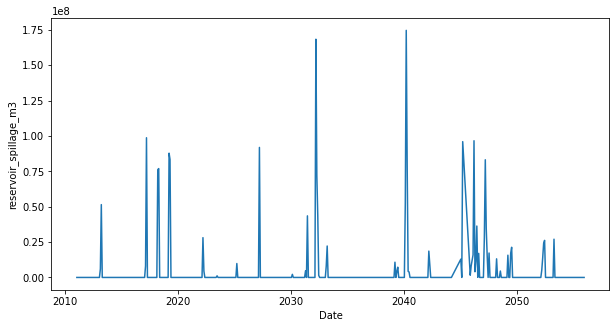

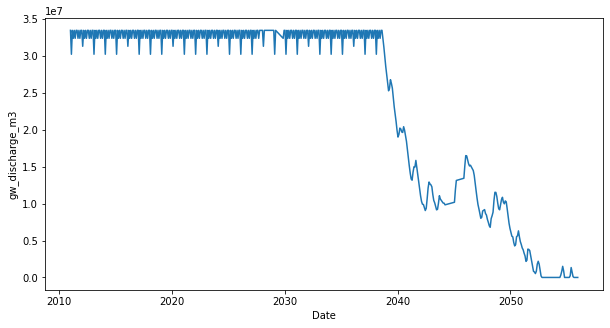

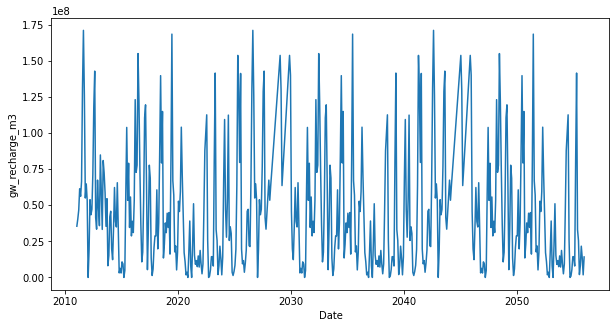

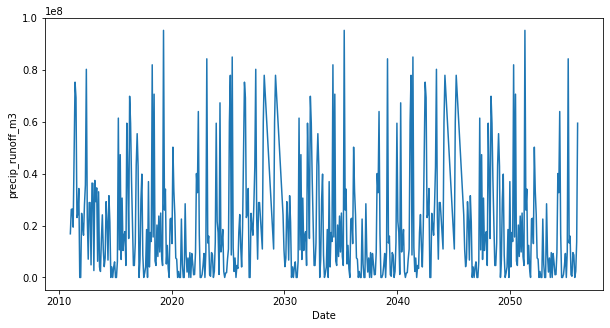

In [31]:
n = len(df_model_data)
flds_explore = [x for x in df_out.columns if (x not in ["year", "month"])]

for i in flds_explore:
    x = np.array(df_out["year"]) + (np.array(df_out["month"]) - 0.5)/12
    y = np.array(df_out[i].iloc[0:n])
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.set_xlabel("Date")
    ax.set_ylabel(str(i))
    ax.plot(x, y)
    plt.show()
    

##  Look at some climate data

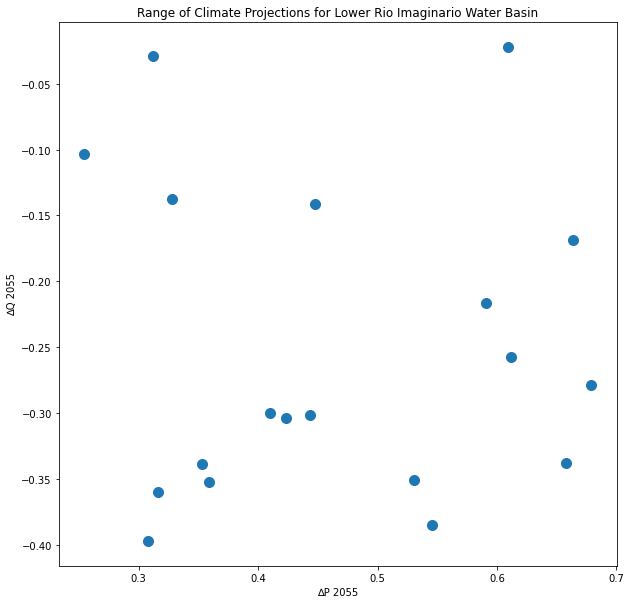

In [160]:
p = df_climate_deltas_annual["delta_p_2055_annual"]
q = df_climate_deltas_annual["delta_q_2055_annual"]
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_xlabel("∆P 2055")
ax.set_ylabel("∆Q 2055")
ax.set_title("Range of Climate Projections for Lower Rio Imaginario Water Basin")
plt.scatter(p, q, s = 100)
plt.savefig("/Users/jsyme/Documents/PRGS/Classes/2021/RDM Tutorial/tutorial2021/code/crdm_project/assignment/img/climate_scatter.jpg", dpi = 300)


In [174]:
print("\n".join(["\t- `%s`: "%(x) for x in df_out.columns]))

	- `year`: 
	- `month`: 
	- `x_11_m3`: 
	- `x_12_m3`: 
	- `x_21_m3`: 
	- `x_22_m3`: 
	- `d_1_m3`: 
	- `d_2_m3`: 
	- `d_3_m3`: 
	- `s_1_m3`: 
	- `s_2_m3`: 
	- `s_3_m3`: 
	- `u_1_m3`: 
	- `u_2_m3`: 
	- `u_3_m3`: 
	- `u_1_proportion`: 
	- `u_2_proportion`: 
	- `u_3_proportion`: 
	- `r_m3`: 
	- `f_1_m3`: 
	- `f_2_m3`: 
	- `groundwater_storage_m3`: 
	- `reservoir_storage_m3`: 
	- `reservoir_release_m3`: 
	- `reservoir_spillage_m3`: 
	- `gw_discharge_m3`: 
	- `gw_recharge_m3`: 
	- `precip_runoff_m3`: 
